In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
Base = automap_base()


engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
Base.prepare(engine,reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Create our session (link) from Python to the DB
Measurements=Base.classes.measurement
Stations=Base.classes.station
session=Session(engine)

In [10]:

first_row =session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x175b1610700>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [11]:
first_row =session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x175b1610d00>,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns=inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns=inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
results=session.query(Measurements.prcp,Measurements.date,).\
order_by(Measurements.date.desc()).all()
print(results)

[(0.0, '2017-08-23'), (0.0, '2017-08-23'), (0.08, '2017-08-23'), (0.45, '2017-08-23'), (0.0, '2017-08-22'), (0.0, '2017-08-22'), (0.5, '2017-08-22'), (0.0, '2017-08-21'), (0.02, '2017-08-21'), (None, '2017-08-21'), (0.56, '2017-08-21'), (0.0, '2017-08-20'), (0.01, '2017-08-20'), (None, '2017-08-20'), (0.0, '2017-08-19'), (0.0, '2017-08-19'), (None, '2017-08-19'), (0.09, '2017-08-19'), (0.0, '2017-08-18'), (0.0, '2017-08-18'), (0.06, '2017-08-18'), (None, '2017-08-18'), (0.0, '2017-08-17'), (0.05, '2017-08-17'), (0.01, '2017-08-17'), (0.13, '2017-08-17'), (0.0, '2017-08-16'), (0.07, '2017-08-16'), (0.12, '2017-08-16'), (0.42, '2017-08-16'), (0.02, '2017-08-15'), (0.0, '2017-08-15'), (0.06, '2017-08-15'), (0.32, '2017-08-15'), (0.42, '2017-08-15'), (0.0, '2017-08-14'), (0.01, '2017-08-14'), (0.08, '2017-08-14'), (0.0, '2017-08-14'), (0.22, '2017-08-14'), (0.0, '2017-08-13'), (None, '2017-08-13'), (0.0, '2017-08-13'), (0.0, '2017-08-13'), (None, '2017-08-13'), (0.0, '2017-08-12'), (0.0, '

In [17]:
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')

In [18]:
query_date=dt.date(2017,8,23)-dt.timedelta(days=366)
print("Query Date:", query_date)

Query Date: 2016-08-22


In [19]:
results=session.query(Measurements.prcp,Measurements.date,Measurements.station,Measurements.tobs).filter(Measurements.date >query_date).order_by(Measurements.date).all()

In [20]:
print(results)

[(0.0, '2016-08-23', 'USC00519397', 81.0), (0.15, '2016-08-23', 'USC00513117', 76.0), (0.05, '2016-08-23', 'USC00514830', 80.0), (None, '2016-08-23', 'USC00517948', 80.0), (0.02, '2016-08-23', 'USC00519523', 80.0), (1.79, '2016-08-23', 'USC00519281', 77.0), (0.7, '2016-08-23', 'USC00516128', 74.0), (0.08, '2016-08-24', 'USC00519397', 79.0), (2.15, '2016-08-24', 'USC00513117', 76.0), (2.28, '2016-08-24', 'USC00514830', 80.0), (None, '2016-08-24', 'USC00517948', 78.0), (1.22, '2016-08-24', 'USC00519523', 79.0), (2.15, '2016-08-24', 'USC00519281', 77.0), (1.45, '2016-08-24', 'USC00516128', 74.0), (0.08, '2016-08-25', 'USC00519397', 80.0), (0.08, '2016-08-25', 'USC00513117', 77.0), (0.0, '2016-08-25', 'USC00514830', 81.0), (0.0, '2016-08-25', 'USC00517948', 81.0), (0.21, '2016-08-25', 'USC00519523', 80.0), (0.06, '2016-08-25', 'USC00519281', 80.0), (0.11, '2016-08-25', 'USC00516128', 77.0), (0.0, '2016-08-26', 'USC00519397', 79.0), (0.03, '2016-08-26', 'USC00513117', 78.0), (0.02, '2016-08

In [21]:
precip_df=pd.DataFrame(results,columns=['Precipitation', 'Date','Station','Temperature'])
precip_df.set_index('Date', inplace=True)

In [22]:
precip_df.sort_values(by='Date', ascending=True)

,Precipitation,Station,Temperature
Date,,,
2016-08-23,0.00,USC00519397,81.0
2016-08-23,0.15,USC00513117,76.0
2016-08-23,0.05,USC00514830,80.0
2016-08-23,NaN,USC00517948,80.0
2016-08-23,0.02,USC00519523,80.0
...,...,...,...
2017-08-22,0.50,USC00516128,76.0
2017-08-23,0.08,USC00519523,82.0
2017-08-23,0.00,USC00519397,81.0


In [53]:
results_plot=session.query(Measurements.date,Measurements.prcp).filter(Measurements.date >query_date).order_by(Measurements.date).all()
#results_plot
#Use Pandas Plotting with Matplotlib to plot 
precipitation_plot_df = pd.DataFrame(results_plot,columns=['Date', 'Precipitation'])
precipitation_plot_df = precipitation_plot_df.dropna()
#precipitation_plot_df.set_index('Date', inplace=True)

precipitation_plot_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


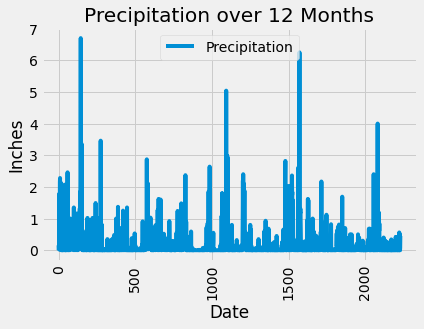

In [56]:
precipitation_plot_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation over 12 Months")
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [58]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(Measurements.station).group_by(Measurements.station).all()

print(len(stations))

9


In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#for station in stations

active_station=session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
print(active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


highest_activity=active_station[0]
temps=session.query(Measurements.tobs).filter(Measurements.station=="USC00519281").order_by((Measurements.tobs).desc()).all()
temperatures=[temp[0] for temp in temps]

ave_temps=session.query(func.avg(Measurements.tobs).filter(Measurements.station=="USC00519281")).all()
ave_temperature=[ave[0] for ave in ave_temps]

print(ave_temperature)
#highest_temp=Max(temp)
#print(highest_temp)

[71.66378066378067]


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature o f the most active station?

highest_temp=temperatures[0]
#print(highest_temp)
lowest_temp=temperatures[-1]
average=(round(ave_temperature[0],2))
print(f"The highest recorded temperature is {highest_temp} The lowest recorded temperature is {lowest_temp} The average temp is {average} ")

The highest recorded temperature is 85.0 The lowest recorded temperature is 54.0 The average temp is 71.66 


In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observations=session.query(Measurements.tobs).filter(Measurements.station=="USC00519281").filter(Measurements.date>query_date).all()
temp_observations


[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [72]:
temperature_observations_df=pd.DataFrame(temp_observations, columns=['Temperature'])
temperature_observations_df

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


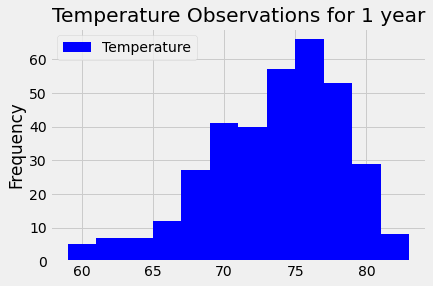

In [74]:
temperature_observations_df.plot.hist(bins=12, title="Temperature Observations for 1 year",  color='blue')

## Bonus Challenge Assignment

In [69]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps_2013(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps_2013('2013-05-09', '2013-05-13'))

[(67.0, 72.83783783783784, 77.0)]


In [71]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps_2014(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps_2014('2014-05-09', '2014-05-13'))

[(68.0, 72.94285714285714, 79.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
